In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 

import statsmodels.api as sm 


In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


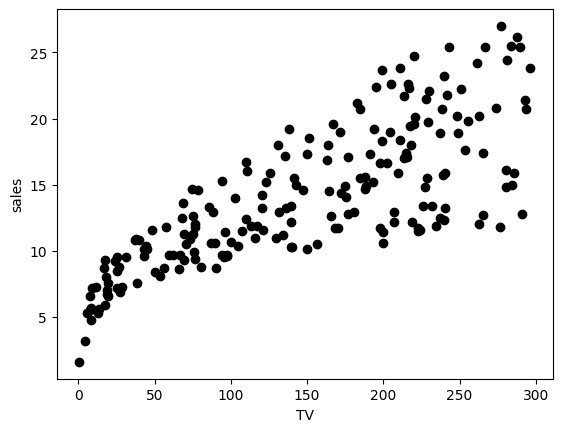

In [4]:
plt.scatter(data['TV'],data['sales'],c='black')
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

In [5]:
x = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()


In [6]:
reg.fit(x,y)

LinearRegression()

R- squared value 

In [7]:
reg.score(x,y)

0.611875050850071

In [10]:
# Print regression coeficient and the regression intercept 

print(reg.coef_)
print(reg.intercept_)

[[0.04753664]]
[7.03259355]


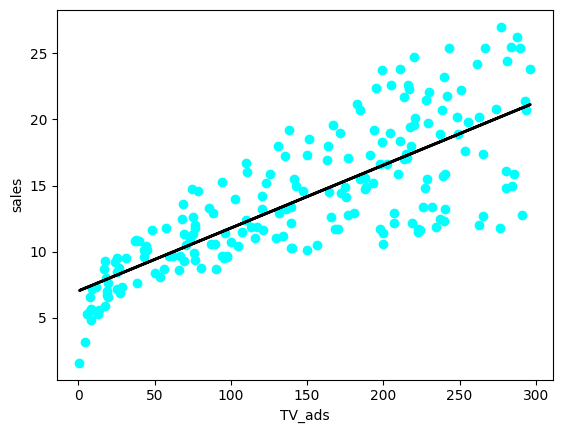

In [14]:
# Plot predicted and the actual values 

y_pred = reg.predict(x)
plt.scatter(data['TV'],data['sales'],c='cyan')
plt.plot(data['TV'],y_pred,c='black',linewidth=2)
plt.xlabel('TV_ads')
plt.ylabel('sales')
plt.show()

In [16]:
# Using statistics to develop the model 

x = data['TV']
y = data['sales']

x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           1.47e-42
Time:                        18:06:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [ ]:
# Analysis of the model based on its Results 


How the R^2 and the adj.R^2 is related to the wellness of the model ?

Ans: Lets say my model is conataining only one dependent(predator)variable, and after creating model if i add 1 more predator there will be significant chane in the R^2, where as the adj._r^2 WHICH has n(number of predator) in its formula. 

There will be remarkable change in it. Hence adj._R^2 is an actual representor of how the model is.

# Calculating VIF 

In [10]:
# calculating the coef-estimation and the y-intercept, creating the function for the same 

import numpy as np 


def coef_estimation(x,y):
    n = np.size(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)


    SS_xy = np.sum(x*y) - (n*y_mean*x_mean)
    SS_xx = np.sum(x*x) - (n*x_mean*x_mean)

    slope = SS_xy/SS_xx

    y_intercept = y_mean - slope*x_mean
    return(y_intercept,slope)

In [11]:
import numpy as np 

x = np.array([2,3,4,5,4,3,2])
y = np.array([9,6,7,5,4,3,6])

co ef_estimation(x,y)

(8.11538461538461, -0.730769230769229)

In [18]:
# calculating R-score 

from sklearn.metrics import r2_score
c,m = coef_estimation(x,y)

y_pred = m*x +c
print(y_pred)

[6.65384615 5.92307692 5.19230769 4.46153846 5.19230769 5.92307692
 6.65384615]


In [14]:
r2_score = r2_score(y,y_pred)

In [17]:
print('r2_score is:', r2_score)

r2_score is: 0.16932457786116306


# Regularization technique:
    1. Ridge Regression 
    2. LOSSO Regression 
    3. Elastic regression 

In [1]:
# 1. Ridge Regression code implementation:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot 


In [3]:
from sklearn.datasets import load_diabetes

In [4]:
data = load_diabetes()

In [6]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [8]:
# solving with linear regression first 
# spliting train and test data 
x = data.data 
y = data.target

In [11]:
# train test split 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [17]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()

In [18]:
reg.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = reg.predict(x_test)

In [22]:
reg.score(x_train,y_train)

0.5159857758740993

In [28]:
from sklearn.metrics import r2_score,mean_squared_error

print('R2_score',r2_score(y_test,y_pred))
print('RMS', np.sqrt(mean_squared_error(y_test,y_pred)))

R2_score 0.5188113124539249
RMS 48.72713760953253


In [29]:
# Using Ridge regression 
from sklearn.linear_model import Ridge 
r = Ridge(alpha=0.0001)

r.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [33]:
y_pred1 = r.predict(x_test)
print('R2_score',r2_score(y_test,y_pred1))
print('RMS', np.sqrt(mean_squared_error(y_test,y_pred1)))

R2_score 0.518973263588495
RMS 48.718937001819555


Implementing Ridge regressoin to see the changes in coeficient m with changes in Alpha 

In [2]:
# creating sample dataset with sklearn 
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np 


In [4]:
x,y = make_regression(n_samples=100, n_features=1, n_informative=1,n_targets=1,noise=20,random_state=13)


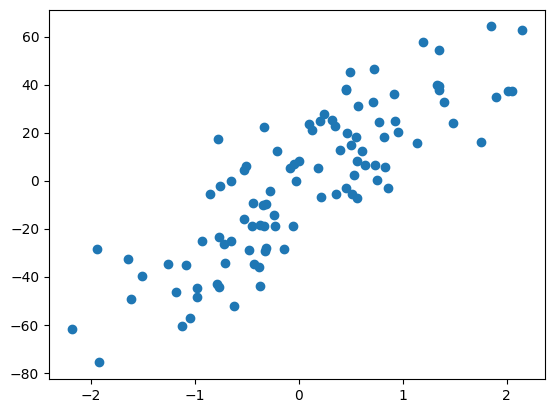

In [5]:
plt.scatter(x,y)

In [7]:
# 1st of all lets try out the Simple LinearRegression 
from sklearn.linear_model import LinearRegression

In [8]:
li=LinearRegression()

In [9]:
li.fit(x,y)

LinearRegression()

In [12]:
print('Coeficient m=',li.coef_)
print('Intercept=',li.intercept_)

Coeficient m= [27.82809103]
Intercept= -2.29474455867698


In [13]:
# Now lets traint the same dataset with Ridge Regression and value of alpha 

from sklearn.linear_model import Ridge 

In [15]:
rr = Ridge(alpha=10)
rr.fit(x,y)
print('Coeficient after adding alpha in Ridge Regression=',rr.coef_)
print('intercept after adding alpha in Ridge Regression=',rr.intercept_)

Coeficient after adding alpha in Ridge Regression= [24.9546267]
intercept after adding alpha in Ridge Regression= -2.1269130035235735


In [17]:
# lets increase alpha 
rr1 = Ridge(alpha=100)
rr1.fit(x,y)
print('Coeficient after adding alpha in Ridge Regression=',rr.coef_)
print('intercept after adding alpha in Ridge Regression=',rr.intercept_)

Coeficient after adding alpha in Ridge Regression= [12.93442104]
intercept after adding alpha in Ridge Regression= -1.4248441496033308


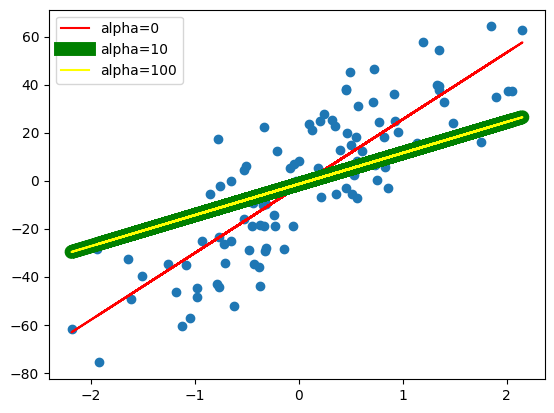

In [26]:
# Plotting the lines got from the model 
plt.scatter(x,y)
plt.plot(x,li.predict(x),color='red',label='alpha=0')
plt.plot(x,rr.predict(x),color='green',label='alpha=10',linewidth=10)
plt.plot(x,rr1.predict(x),color='yellow',label='alpha=100')
plt.legend()

# Then we can find the best fit line by calculating the r1_score()

In [33]:
# Breaking sklearn and making our own class, i.e. showing the code inside sklearn 

class MeraRidge:
    def __init__(self,alpha=10):
        self.alpha=alpha
        self.m=None
        self.c=None

    def fit(self,x_train,y_train):
        num=0
        den=0

        for i in range (x_train.shape[0]):
            num=num + (y_train[i]-y_train.mean())*(x_train[i]-x_train.mean())
            den=den + (x_train[i]-x_train.mean())*(x_train[i]-x_train.mean())

        self.m = num/(den +self.alpha)
        self.c = y_train.mean() - (self.m*x_train.mean())

        print(self.m,self.c)

    def predict(x_test):
        pass

In [34]:
reg = MeraRidge(alpha=10)
reg.fit(x,y)

[24.9546267] [-2.126913]


# Applying Ridge regression on the n-dimenssional data

In [35]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np


In [36]:
x,y = load_diabetes(return_X_y=True)


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=13)

In [39]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1,solver='cholesky')

In [40]:
reg.fit(x_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [41]:
y_pred=reg.predict(x_test)

In [43]:
r2_score(y_test,y_pred)

0.37915546090987384

In [45]:
print(reg.coef_)
print(reg.intercept_)

[  -5.10373917 -211.97523484  532.48566195  297.38876175  -57.55670284
  -95.16345048 -206.58948886  105.25789549  437.89687435  124.41404427]
150.3250826583213


In [60]:
# Trying this out in our own class 

class MeraRidge:

    def __init__(self,alpha=0.1):
        self.aplpha=alpha
        self.coef_=None
        self.intercept_=None 

    def fit(self,x_train,y_train):
        x_train = np.insert(x_train,0,1,axis=1)
        I = np.identity(x_train.shape[1])
        result = np.linalg.inv(np.dot(x_train.T,x_train)+self.aplpha*I).dot(x_train.T).dot(y_train)

        self.intercept_ = result[0]
        self.coef_ = result[1:]

    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_


In [61]:
reg = MeraRidge()
reg.fit(x_train,y_train)

In [62]:
y_pred = reg.predict(x_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.37898964959371784
[  -5.13593875 -211.98729607  532.49470045  297.3764734   -57.53286138
  -95.10596065 -206.59160844  105.24379761  437.90471083  124.43126839]
150.28212715147606


Applying ridge regularization using Gradient descent, the methods we were applying before was OLS, lets apply Gradient descent now.. 




In [63]:
# applying gradient descent using sklearn

from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score 
import numpy as np 


In [64]:
x,y = load_diabetes(return_X_y=True)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=13)

In [67]:
from sklearn.linear_model import SGDRegressor

In [68]:
REG = SGDRegressor(penalty='l1',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [69]:
REG.fit(x_train,y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500,
             penalty='l1')

In [76]:
y_pred = REG.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))
print('\nCoef=',REG.coef_)
print('\nIntercept=',REG.intercept_)

r2_score 0.3875267847829107

Coef= [   2.62257098 -190.99714764  520.67376344  303.77280455  -33.15965998
  -97.7547656  -210.496361    129.93809277  386.64314047  160.51847119]

Intercept= [155.92598036]


In [77]:
# Now lets try Gradient Descent using ridge regression 

from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg') 

In [78]:
reg.fit(x_train,y_train)

Ridge(alpha=0.001, max_iter=500, solver='sparse_cg')

In [86]:
y_pred = reg.predict(x_test)
print('R2_Score',r2_score(y_test,y_pred))
print('\ncoef=', reg.coef_)
print('\nintercept=',reg.intercept_)

R2_Score 0.365808295279593

coef= [ -16.78271492 -247.85463693  578.77675814  315.47565987 -492.53114042
  229.71248486  -52.47665778  111.34922582  664.47279485  108.51171141]

intercept= 150.24625886117605


Interview Question on Ridge regression and proof :

1. How the coefficients get affected ? Menas by varying the alpha what the change in the each ciefficient of independent cvariabl ?

 Ans: As we starts increasing the alpha value there will be decrease in the coefficient but the coeficient will never become zero. 


In [2]:
# Proof:

from sklearn.datasets import load_diabetes   
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


 

In [3]:
data = load_diabetes()


In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['TARGET']= data['target']

In [5]:
df['TARGET']

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: TARGET, Length: 442, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2, random_state=2)

In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score 

In [8]:
coefs = []
R2_scores =[]

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(x_test)
    R2_scores.append(r2_score(y_test,y_pred))

Text(0.5, 1.0, 'Alpha=1000, and R2_score= -0.01')

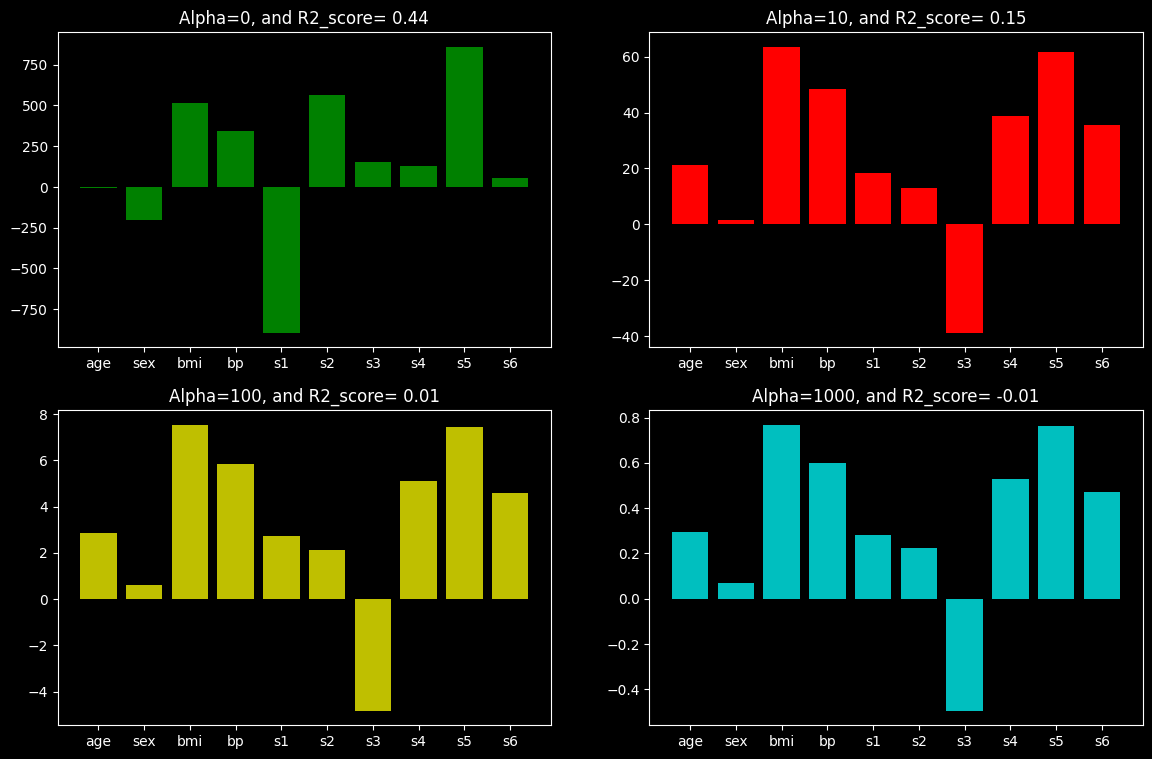

In [29]:
plt.style.use('dark_background')
plt.figure(figsize=(14,9))
plt.subplot(2,2,1)
plt.bar(data.feature_names,coefs[0],color='g')
plt.title('Alpha=0, and R2_score= {}'.format(round(R2_scores[0],2)))

plt.subplot(2,2,2)
plt.bar(data.feature_names,coefs[1],color= 'r')
plt.title('Alpha=10, and R2_score= {}'.format(round(R2_scores[1],2)))

plt.subplot(2,2,3)
plt.bar(data.feature_names,coefs[2],color='y')
plt.title('Alpha=100, and R2_score= {}'.format(round(R2_scores[2],2)))

plt.subplot(2,2,4)
plt.bar(data.feature_names,coefs[3],color='c')
plt.title('Alpha=1000, and R2_score= {}'.format(round(R2_scores[3],2)))

In [32]:
# checking how the most highiest values is decreasing with higher rate 

alphas = [0, 0.0001, 0.001, 0.01, 0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg= Ridge(alpha=i)
    reg.fit(x_train,y_train)

    coefs.append(reg.coef_.tolist())

input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha']=alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


By running the above code we can see the drastic change into the variables coeficient. 

In [33]:
# plotting the graphs for each alpha how its affecting the coefficient 

alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coef = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(x_train,y_train)

    coef.append(reg.coef_.tolist())

In [34]:
input_array = np.array(coef).T

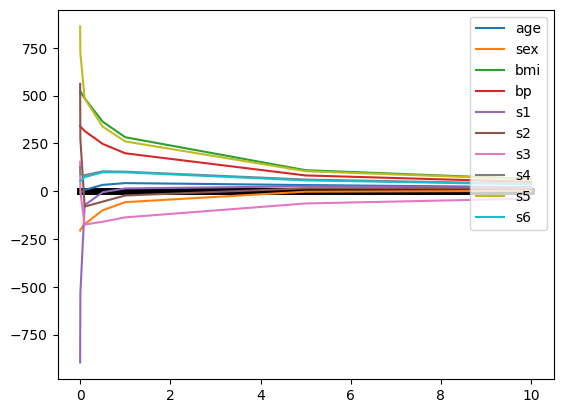

In [38]:
plt.style.use('default')
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)

for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

# Code implementation of Lasso regression

In [1]:
# Importing essential libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import Lasso 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression 
import warnings 
warnings.filterwarnings ('ignore') 

In [2]:
x,y = make_regression(n_samples=100, n_features= 1, n_informative= 1, noise=20, random_state=13)


In [3]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Coef. m= [28.08881503]
Intercept c = -2.98270209322274


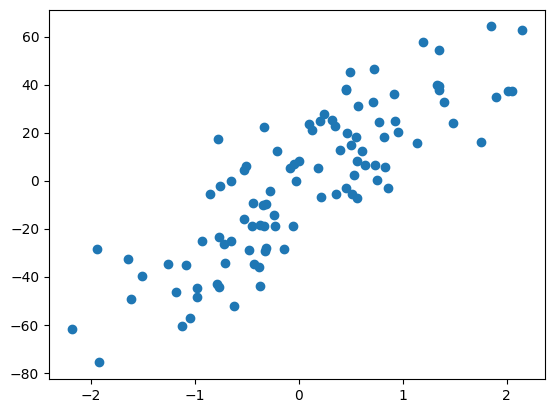

In [4]:
#Lets see the result using Linear regression first and then will move to Lasso and will try to optimize the error

from sklearn.linear_model import LinearRegression 

plt.scatter(x,y)
reg = LinearRegression()
reg.fit(x_train,y_train)
print('Coef. m=',reg.coef_)
print('Intercept c =',reg.intercept_)

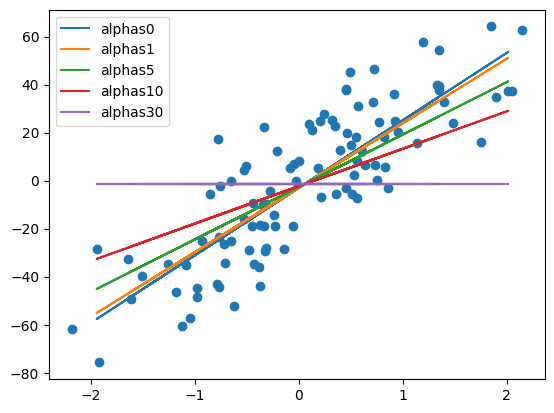

In [5]:
# Now lets apply Lasso regressin for different values of alpha 
alphas= [0,1,5,10,30]
plt.scatter(x,y)

for i in alphas:
    L=Lasso(alpha=i)
    L.fit(x_train,y_train)
    plt.plot(x_test,L.predict(x_test),label = 'alphas{}'.format(i))
plt.legend()
plt.show()

In [8]:
# Now lets see how the coeficient gettting affected 

from sklearn.linear_model import Lasso 

import numpy as np 
import pandas as pd 

from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score as rr

from sklearn.model_selection import train_test_split

 

In [9]:
data = load_diabetes()

In [10]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [32]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [11]:
x_train,x_test,y_train,y_test = train_test_split(data.data, data.target, test_size= 0.2, random_state= 2)

In [12]:
import warnings 
warnings.filterwarnings ('ignore') 

coef =[]
r2_score = []

for i in [0,0.1,1,10]:
    L= Lasso(alpha=i)
    L.fit(x_train,y_train)

    coef.append(L.coef_.tolist())
    y_pred = L.predict(x_test)
    r2_score.append(rr(y_test,y_pred))

print(coef)
print(r2_score)

[[-9.158653178827242, -205.45432152374494, 516.6937447748396, 340.61999898656967, -895.5519890478237, 561.2206689816614, 153.89310382130685, 126.7313952204412, 861.1269967641401, 52.42112237084289], [0.0, -113.96992828855377, 526.7443960144338, 292.62847197812994, -82.69368148743654, -0.0, -152.6853383502316, 0.0, 551.0802905457624, 7.170992067171023], [0.0, 0.0, 363.8857421633681, 27.273163042284008, 0.0, 0.0, -0.0, 0.0, 336.1372619995, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0]]
[0.4399338662581874, 0.4334618007658305, 0.3256808253711555, -0.012517603619692785]
